# Решение

Импорт библиотек

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

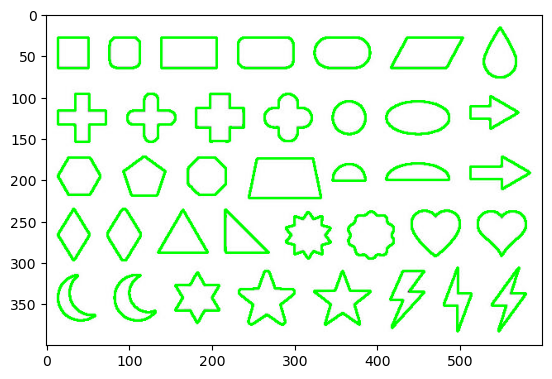

In [2]:
# 1. Загрузка изображения. Перевод в оттенки серого
img_path = "images/simple-shapes.jpg"
image = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Цветное изображение
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Преобразование в градации серого

# 2.1. Пороговая фильтрация
_, binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# 2.2. Нахождение контуры изображения
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 2.3. Отрисовываем контуры
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# 2.4. Отображаем резульат
plt.imshow(output_image)
plt.show()

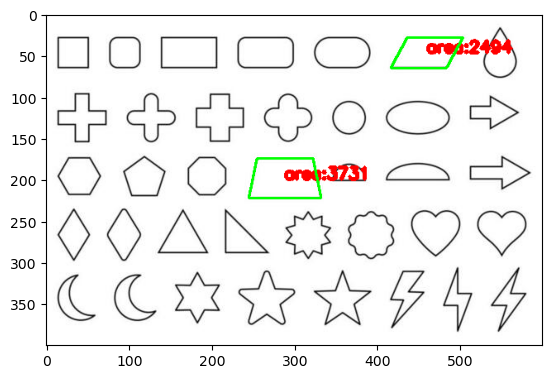

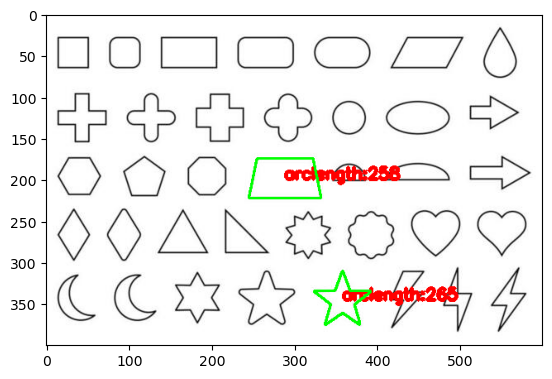

In [18]:
def display_top_2(image:np.ndarray, parameter:str="area"):
    """
    Function to draw top two contours from an image
    based on parameter chosen: area or arclength

    img: input image
    parameter: parameter to sort contours
    """
    top_2_image = image.copy()
    if parameter == "area":
        contours_dict = {cv2.contourArea(contour):contour for contour in contours}
        max_2_contours = [contours_dict[arclength] for arclength in sorted(contours_dict.keys())[-2:]]
        
    elif parameter == "arclength":    
        contours_dict = {cv2.arcLength(contour, closed=True):contour for contour in contours}
        max_2_contours = [contours_dict[arclength] for arclength in sorted(contours_dict.keys())[-2:]]
    else: 
        raise ValueError("Parameter Not implemented")
    
    for contour in max_2_contours:
        if parameter == "area":
            value = cv2.contourArea(contour)
        else:
            value = cv2.arcLength(contour, closed=True)
        M = cv2.moments(contour)
        cx = int(M["m10"] / M["m00"])  # Координаты центра
        cy = int(M["m01"] / M["m00"])
        # Подписать площадь на изображении
        cv2.putText(top_2_image, f"{parameter}:{int(value)}", (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 4)
    cv2.drawContours(top_2_image, max_2_contours, -1, (0, 255, 0), 2)
    # Отображение результата
    plt.imshow(top_2_image)
    plt.show()
        
display_top_2(image=image, parameter="area")
display_top_2(image=image, parameter="arclength")